In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)

In [3]:
X, Y = np.meshgrid(X, Y)

In [4]:
# Mean vector and covariance matrix
mu1 = np.array([0., 0.])
Sigma1 = np.array([[ 1. , 0.], [0.,  1.0]])
mu2 = np.array([5., 0.])
Sigma2 = np.array([[ 4. , 0.], [0.,  4.0]])

In [5]:
# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

In [6]:
def multivariate_gaussian(pos, mu, Sigma):
    #"""Return the multivariate Gaussian distribution on array pos.
    #pos is an array constructed by packing the meshed arrays of variables
    #x_1, x_2, x_3, ..., x_k into its _last_ dimension.
    #"""#

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N


In [7]:
# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu1, Sigma1)

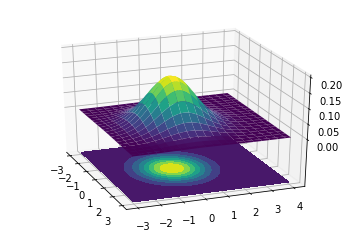

In [8]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
lax = fig.gca(projection='3d')
lax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = lax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
lax.set_zlim(-0.15,0.2)
lax.set_zticks(np.linspace(0,0.2,5))
lax.view_init(27, -21)

plt.show()

In [9]:
X = np.linspace(-2, 10, N)
Y = np.linspace(-5, 6, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_gaussian(pos, mu2, Sigma2)

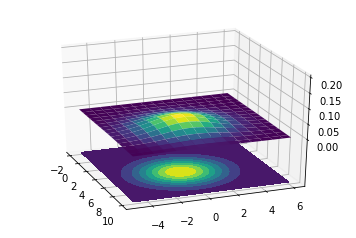

In [10]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()